###  <font size="4"> <center> <h1>Time-series Forecasting Modeling for IDF Multivariate Sensor Regression on Generator Output with LSTM</h1> </center> 

## 1. _Problem Statement_

Fenomena _missing value_ merupakan sebuah fenomena yang lazim terjadi pada kelompok data yang disusun berdasarkan waktu. Akibat adanya fenomena ini, kelompok data yang didapat akan menjadi tidak lengkap. Banyak metode analisis kelompok data yang dilakukan oleh industri dan perusahaan menuntut nilai-nilai yang hilang pada kelompok data ini untuk diganti menjadi nilai yang dapat dipertanggungjawabkan sehingga hasil analisis yang didapatkan menjadi lebih baik. Di antara beberapa metode untuk mengganti nilai-nilai yang hilang ini adalah imputasi. Imputasi merupakan sebuah metode untuk memperkirakan nilai yang hilang pada suatu kelompok data dengan cara mendapatkan sebuah pola keseluruhan yang ada pada kelompok data tersebut [1].

Kelompok data yang disusun berdasarkan waktu (*time series data*) dapat dilakukan imputasi dengan beberapa algoritma. Salah satu jenis algoritma ini adalah metode imputasi _nearest neighbor_. Metode _nearest neighbor_ bekerja dengan cara memetakan rentang data yang hendak diimputasi menjadi sebuah titik-titik pada sebuah dimensi – n. Titik–titik ini memiliki jarak antara satu dengan yang lainnya. Metode _nearest neighbor_ akan memilih satu jarak tertentu dari data hilang yang hendak diimputasi sehingga data-data yang tersedia pada jarak tersebut akan mempengaruhi prediksi dari data hilang tersebut [2].

Setelah kelompok data yang dimiliki lengkap, langkah selanjutnya dapat dilakukan dengan pemodelan sistem yang mampu untuk memprediksi nilai–nilai masa depan dari kelompok data yang lengkap tersebut. Prediksi nilai masa depan dari kelompok data tentunya dapat memberi gambaran kondisi dari sebuah sistem atau sebuah bisnis. Sebagai contoh, untuk kelompok data yang bersumber dari rekaman data sensor, prediksi nilai rekaman data pada dapat menggambarkan kondisi masa depan _plant_ yang direkam oleh sensor, untuk kelompok data yang bersumber dari data penjualan perusahaan, prediksi nilai penjualan di masa yang akan datang akan menggambarkan _trend_ penjualan perusahaan di masa depan dan tingkat profitabilitas dari perusahaan tersebut [3].

## 2. Deskripsi Data yang Digunakan

_Dataset_ yang digunakan oleh kelompok kami merupakan data dari rekaman *wireless sensor network* pada *Induced Draft Fan System* (IDF) yang didapatkan dari Kerja Praktek pada Perusahaan Indonesia Power pada tahun 2021. Dataset memiliki 18 atribut. Atribut yang akan jadi fokus untuk prediksi adalah CapacityGenerator. 

|     **Atribut dari Dataset** 	|     **Keterangan**                                                              	|
|------------------------------	|---------------------------------------------------------------------------------	|
|     Timestamp                  	|     Waktu pengambilan _data_               	|
|     CoalFlowRate                  	|     Nilai dari   aliran batubara di *Coal Feeder* menuju *Boiler*               	|
|     CapacityGenerator                  	|     Nilai dari kapasitas keluaran yang dihasilkan oleh     Generator            	|
|     IBFTemperature1                  	|     Nilai sensor dari IDF untuk *Inboard Bearing Fan     Temperature* 1         	|
|     IBMTemperature                  	|     Nilai sensor dari IDF untuk *Inboard Bearing Motor     Temperature*         	|
|     IBXFVibration                  	|     Nilai sensor dari IDF untuk   *Inboard Bearing X Axis Fan     Vibration*    	|
|     IBYFVibration                  	|     Nilai sensor dari IDF untuk *Inboard Bearing Y Axis Fan     Vibration*      	|
|     InletPosition                  	|     Nilai sensor dari IDF untuk *Inlet Control Damper     Position*             	|
|     MBFTemperature1                  	|     Nilai sensor dari IDF untuk *Middle Bearing Fan     Temperature* 1          	|
|     MotorCurrent                  	|     Nilai sensor dari IDF untuk *Motor Current*                                 	|
|     MSCUTemperature1                 	|     Nilai sensor dari IDF untuk *Motor Stator Coil U*     Temperature 1         	|
|     MSCVTemperature1                 	|     Nilai sensor dari IDF untuk *Motor Stator Coil V     Temperature* 1         	|
|     MSCWTemperature1                 	|     Nilai sensor dari IDF untuk *Motor Stator Coil W     Temperature* 1         	|
|     OBFTemperature1                 	|     Nilai sensor dari IDF untuk *Outboard Bearing Fan     Temperature* 1         	|
|     OBFTemperature                 	|     Nilai sensor dari IDF untuk *Outboard Bearing Motor     Temperature*        	|
|     OBXFVibration                 	|     Nilai sensor dari IDF untuk *Outboard Bearing X Axis     Fan Vibration*     	|
|     OBYFVibration                 	|     Nilai sensor dari IDF untuk *Outboard Bearing Y Axis     Fan Vibration*     	|
|     OutletPressure                 	|     Nilai sensor dari IDF untuk *Outlet Pressure*                               	|

## 3. _Data Understanding_

Pada bagian ini, kita akan melakukan penelaahan data, baik analisis statistik dan visualisasi.

### a. Memanggil Modul atau _Library_ yang Digunakan

Langkah pertama yaitu memanggil modul atau _library_ yang akan digunakan untuk melakukan _data understanding_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### b. Membaca dan Menampilkan _Dataset_ yang Digunakan

Pada langkah kedua ini, kita perlu membaca _dataset_ terlebih dahulu dan menampilkannya sebelum dilanjutkan ke tahap berikutnya. Pembacaan dan penampilan _dataset_ menggunakan modul Pandas. ___Dataset_ yang digunakan dalam bentuk CSV__. Kemudian data disimpan di dalam _Data Frame_ sebagai df.

In [2]:
df = pd.read_csv('Dataset Sensor IDF.csv')
df.head()

Timestamp  CoalFlowRate  CapacityGenerator  IBFTemperature1  \
0  2021-01-04T08:00:00Z           NaN         291.871826         60.01569   
1  2021-01-04T08:10:00Z    160.137988         291.032700         60.01569   
2  2021-01-04T08:20:00Z    163.893270         291.288544         60.01569   
3  2021-01-04T08:30:00Z    160.303126         291.749359         60.01569   
4  2021-01-04T08:40:00Z    164.615872         290.982100         60.01569   

   IBMTemperature  IBXFVibration  IBYFVibration  InletPosition  \
0       44.866653      27.673828       8.402344      86.151474   
1       44.897957      27.673828       8.402344      84.605774   
2       44.802406      27.673828       8.402344      86.911450   
3       44.729187      27.673828       8.402344      85.372024   
4       44.713110      27.673828       8.402344      84.776610   

   MBFTemperature1  MotorCurrent  MSCUTemperature1  MSCVTemperature1  \
0        60.055817    186.867157         66.078770          65.89796   
1        60.055817    183.021790         65.520250          65.31032   
2        60.055817    185.379669         65.418976          65.20593   
3        60.055817    184.576019         65.397880          65.20522   
4        60.055817    183.106934         65.294790          65.06393   

   MSCWTemperature1  OBFTemperature1  OBFTemperature  OBXFVibration  \
0         66.245730        63.393276       41.102238      32.683594   
1         65.624344        63.393276       41.137157      32.683594   
2         65.555810        63.393276       41.131218      32.683594   
3         65.549120        63.393276       41.114918      32.683594   
4         65.384730        63.393276       41.130547      32.683594   

   OBYFVibration  OutletPressure  
0      14.068359      529.420700  
1      14.068359      522.137756  
2      14.068359      507.609039  
3      14.068359      485.396057  
4      14.068359      482.811300

### c. Menampilkan Tipe Data dan Jumlah _Missing Value_ dari _Dataset_

Langkah ini digunakan untuk mengetahui tipe dari setiap atribut atau kolom yang terdapat di _dataset_ dan mengecek dan menjumlahkan_missing value_ pada setiap atribut. Hal pertama yang dilakukan dengan mengecek tipe data dari setiap atribut yang ada di _dataset_.

In [3]:
# Menampilkan tipe data untuk semua fitur
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          674 non-null    object 
 1   CoalFlowRate       669 non-null    float64
 2   CapacityGenerator  671 non-null    float64
 3   IBFTemperature1    673 non-null    float64
 4   IBMTemperature     670 non-null    float64
 5   IBXFVibration      672 non-null    float64
 6   IBYFVibration      673 non-null    float64
 7   InletPosition      671 non-null    float64
 8   MBFTemperature1    671 non-null    float64
 9   MotorCurrent       672 non-null    float64
 10  MSCUTemperature1   672 non-null    float64
 11  MSCVTemperature1   672 non-null    float64
 12  MSCWTemperature1   672 non-null    float64
 13  OBFTemperature1    673 non-null    float64
 14  OBFTemperature     671 non-null    float64
 15  OBXFVibration      672 non-null    float64
 16  OBYFVibration      673 non

Tipe data yang ada terdiri dari 1 buah tipe data objek, yaitu atribut Timestamp, dan 17 tipe data _numeric float_. Selanjutnya kita melakukan pengecekan _missing value_ dan menjumlahkan _missing value_ pada setiap atribut.

In [4]:
# Mengecek dan menjumlahkan missing value per fitur  
print('Cek missing value untuk setiap fitur:')
print(df.isnull().sum())
# Menjumlahkan total missing value untuk semua fitur
print('\nTotal missing value yang ditemukan:')
print(df.isnull().sum().sum())

Cek missing value untuk setiap fitur:
Timestamp            0
CoalFlowRate         5
CapacityGenerator    3
IBFTemperature1      1
IBMTemperature       4
IBXFVibration        2
IBYFVibration        1
InletPosition        3
MBFTemperature1      3
MotorCurrent         2
MSCUTemperature1     2
MSCVTemperature1     2
MSCWTemperature1     2
OBFTemperature1      1
OBFTemperature       3
OBXFVibration        2
OBYFVibration        1
OutletPressure       3
dtype: int64

Total missing value yang ditemukan:
40


### d. Melakukan Deskripsi Statistik pada _Dataset_

Langkah ini, kita perlu mencari deskripsi data dari dataset yang telah didapatkan. Deskripsi statistiknya terdiri dari:
1. Jumlah data (_count_)
2. Rerata (_mean_)
3. Standar deviasi (_std_)
4. Nilai minimal (_min_)
5. Nilai kuartil bawah (_25%_)
6. Nilai median (_50%_)
7. Nilai kuartil rendah (_75%_)
8. Nilai maksimal (_max_)

In [5]:
df.describe()

CoalFlowRate  CapacityGenerator  IBFTemperature1  IBMTemperature  \
count    669.000000         671.000000       673.000000      670.000000   
mean     163.716938         279.048910        58.082480       44.859274   
std       18.071818          27.667570         1.888429        1.925573   
min       44.488240          69.976050        54.186054       41.237724   
25%      155.203620         271.884903        56.745544       43.412803   
50%      165.160746         288.637300        58.263450       44.618879   
75%      175.488425         293.299820        60.015690       45.900616   
max      194.757544         310.689636        60.015690       49.212210   

       IBXFVibration  IBYFVibration  InletPosition  MBFTemperature1  \
count   6.720000e+02   6.730000e+02     671.000000       671.000000   
mean    2.767383e+01   8.402344e+00      85.157361        58.069914   
std     3.555360e-15   1.777678e-15       5.925059         1.980621   
min     2.767383e+01   8.402344e+00      68.826320        53.925130   
25%     2.767383e+01   8.402344e+00      81.114465        56.756708   
50%     2.767383e+01   8.402344e+00      85.428220        58.336536   
75%     2.767383e+01   8.402344e+00      89.340830        60.055817   
max     2.767383e+01   8.402344e+00      99.421690        60.055817   

       MotorCurrent  MSCUTemperature1  MSCVTemperature1  MSCWTemperature1  \
count    672.000000        672.000000        672.000000        672.000000   
mean     181.866452         61.787333         61.614135         61.942660   
std       12.443470          3.371267          3.382259          3.373817   
min      148.638977         55.651142         55.468660         55.835846   
25%      173.140613         58.830496         58.620049         58.977399   
50%      181.383957         61.821346         61.621517         61.957310   
75%      190.505184         64.118011         63.954373         64.303511   
max      222.716156         72.322940         72.176790         72.594086   

       OBFTemperature1  OBFTemperature  OBXFVibration  OBYFVibration  \
count       673.000000      671.000000   6.720000e+02     673.000000   
mean         61.302314       39.999937   3.268359e+01      14.068359   
std           2.061248        1.095873   7.110720e-15       0.000000   
min          57.040455       37.851430   3.268359e+01      14.068359   
25%          59.906880       39.147518   3.268359e+01      14.068359   
50%          61.503513       39.877716   3.268359e+01      14.068359   
75%          63.393276       40.647522   3.268359e+01      14.068359   
max          63.393276       42.649445   3.268359e+01      14.068359   

       OutletPressure  
count      671.000000  
mean       484.255131  
std         63.818869  
min        262.051025  
25%        447.283860  
50%        499.333282  
75%        531.527681  
max        639.706055

### e. Melakukan Korelasi Tiap Fitur Sebelum Diseleksi Fitur

Langkah ini dilakukan untuk melihat korelasi antar atribut atau fitur. Hal ini dilakukan untuk melihat hubungan paling tinggi untuk setiap atribut.

<AxesSubplot:>

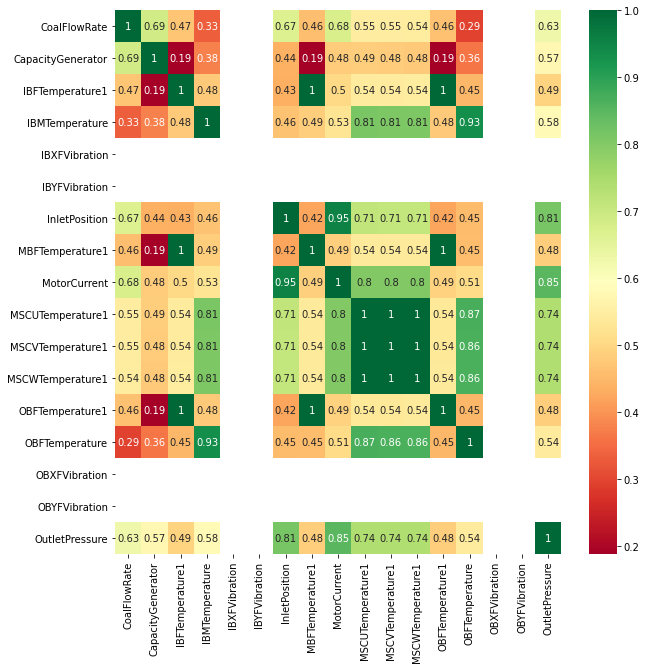

In [6]:
corr_Pearson = df.corr(method='pearson').round(10)
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_Pearson, annot=True, cmap="RdYlGn")

Hasil korelasi _heatmap_ Pearson yang didapatkan yaitu atribut dari 
1. IBXFVibration 
2. IBYFVibration 
3. OBXFVibration 
4. OBYFVibration 

Keempat atribut tersebut tidak memiliki korelasi dengan atribut lain. Hal ini dikarenakan nilai keempat atribut tersebut bernilai stagnan sehingga tampilan dari _heatmap_ berwarna putih.

Selain itu, _dataset_ yang digunakan pada tugas ini merupakan tipe dataset _full float_ dan _time series_ sehingga setiap _data point_ atau _example_ berbeda pada setiap _timestamp_.

# 4. _Data Preparation_ dan _Data Preprocessing_

Bagian ini kita akan melakukan perbaikan data dan melakukan _feature engineering_.

### a. Menghilangkan Kolom yang Bernilai Stagnan

Berdasarkan korelasi _heatmap_ Pearson pada langkah ini, kita dapat lihat bahwa atribut **IBXFVibration, IBYFVibration, OBXFVibration, dan OBYFVibration** memiliki nilai yang stagnan sehingga tidak terdapat korelasi dengan variabel lainnya. Oleh karena itu, keempat fitur tersebut akan dibuang dari _dataset_ melalui _preprocessing data_ di tahap ini. 

In [7]:
df_drop = df.drop(columns=['IBXFVibration', 'IBYFVibration', 'OBXFVibration', 'OBYFVibration'])
df_drop

Timestamp  CoalFlowRate  CapacityGenerator  IBFTemperature1  \
0    2021-01-04T08:00:00Z           NaN         291.871826        60.015690   
1    2021-01-04T08:10:00Z    160.137988         291.032700        60.015690   
2    2021-01-04T08:20:00Z    163.893270         291.288544        60.015690   
3    2021-01-04T08:30:00Z    160.303126         291.749359        60.015690   
4    2021-01-04T08:40:00Z    164.615872         290.982100        60.015690   
..                    ...           ...                ...              ...   
669  2021-01-08T23:30:00Z    116.980274         140.474167        55.545338   
670  2021-01-08T23:40:00Z    124.324574         157.020300        55.495953   
671  2021-01-08T23:50:00Z    123.119489         171.910934        55.546814   
672  2021-01-09T00:00:00Z    124.043811         165.244308        55.570496   
673  2021-01-09T00:10:00Z    123.613632         160.356415        55.613327   

     IBMTemperature  InletPosition  MBFTemperature1  MotorCurrent  \
0         44.866653      86.151474        60.055817    186.867157   
1         44.897957      84.605774        60.055817    183.021790   
2         44.802406      86.911450        60.055817    185.379669   
3         44.729187      85.372024        60.055817    184.576019   
4         44.713110      84.776610        60.055817    183.106934   
..              ...            ...              ...           ...   
669       42.466550      78.045000        55.275574    164.300949   
670       42.426743      84.748580        55.265530    172.749084   
671       42.464527      84.748184        55.302130    173.371246   
672       42.480972      85.528580        55.320340    175.019638   
673       42.521004      80.813450        55.380642    170.348511   

     MSCUTemperature1  MSCVTemperature1  MSCWTemperature1  OBFTemperature1  \
0           66.078770         65.897960         66.245730        63.393276   
1           65.520250         65.310320         65.624344        63.393276   
2           65.418976         65.205930         65.555810        63.393276   
3           65.397880         65.205220         65.549120        63.393276   
4           65.294790         65.063930         65.384730        63.393276   
..                ...               ...               ...              ...   
669         57.212470         57.184258         57.583614        58.344055   
670         57.608467         57.542217         57.938847        58.322853   
671         58.002220         57.924280         58.319363        58.405350   
672         58.296673         58.235270         58.618164        58.442436   
673         58.457558         58.471294         58.865253        58.592735   

     OBFTemperature  OutletPressure  
0         41.102238      529.420700  
1         41.137157      522.137756  
2         41.131218      507.609039  
3         41.114918      485.396057  
4         41.130547      482.811300  
..              ...             ...  
669       38.981930      329.312073  
670       38.929665      397.534729  
671       38.931786      433.367100  
672       38.951378      423.801544  
673       38.979065      407.886700  

[674 rows x 14 columns]

### b.  Melakukan Imputasi pada _NaN Values_

Proses imputasi dilakukan dengan metode KNN Imputer dengan fungsi bobot "_distance_" karena pada pemodelan _time-series_ ini memiliki nilai yang berbeda tiap kurun _timestamp_-nya sehingga nilai yang diambil adalah nilai terdekat dari _NaN values_. 

In [8]:
# Mengganti nilai NaN dengan menggunakan metode KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1, weights='distance', metric='nan_euclidean')
df_new = df_drop.copy()
df_new = pd.DataFrame(imputer.fit_transform(df_new[df_new.columns.difference(['Timestamp'])]), 
                      columns = df_drop[df_drop.columns.difference(['Timestamp'])]
.columns)
df_new.isna().any()
df_new.isna().sum()
df_new

CapacityGenerator  CoalFlowRate  IBFTemperature1  IBMTemperature  \
0           291.871826    161.958567        60.015690       44.866653   
1           291.032700    160.137988        60.015690       44.897957   
2           291.288544    163.893270        60.015690       44.802406   
3           291.749359    160.303126        60.015690       44.729187   
4           290.982100    164.615872        60.015690       44.713110   
..                 ...           ...              ...             ...   
669         140.474167    116.980274        55.545338       42.466550   
670         157.020300    124.324574        55.495953       42.426743   
671         171.910934    123.119489        55.546814       42.464527   
672         165.244308    124.043811        55.570496       42.480972   
673         160.356415    123.613632        55.613327       42.521004   

     InletPosition  MBFTemperature1  MSCUTemperature1  MSCVTemperature1  \
0        86.151474        60.055817         66.078770         65.897960   
1        84.605774        60.055817         65.520250         65.310320   
2        86.911450        60.055817         65.418976         65.205930   
3        85.372024        60.055817         65.397880         65.205220   
4        84.776610        60.055817         65.294790         65.063930   
..             ...              ...               ...               ...   
669      78.045000        55.275574         57.212470         57.184258   
670      84.748580        55.265530         57.608467         57.542217   
671      84.748184        55.302130         58.002220         57.924280   
672      85.528580        55.320340         58.296673         58.235270   
673      80.813450        55.380642         58.457558         58.471294   

     MSCWTemperature1  MotorCurrent  OBFTemperature  OBFTemperature1  \
0           66.245730    186.867157       41.102238        63.393276   
1           65.624344    183.021790       41.137157        63.393276   
2           65.555810    185.379669       41.131218        63.393276   
3           65.549120    184.576019       41.114918        63.393276   
4           65.384730    183.106934       41.130547        63.393276   
..                ...           ...             ...              ...   
669         57.583614    164.300949       38.981930        58.344055   
670         57.938847    172.749084       38.929665        58.322853   
671         58.319363    173.371246       38.931786        58.405350   
672         58.618164    175.019638       38.951378        58.442436   
673         58.865253    170.348511       38.979065        58.592735   

     OutletPressure  
0        529.420700  
1        522.137756  
2        507.609039  
3        485.396057  
4        482.811300  
..              ...  
669      329.312073  
670      397.534729  
671      433.367100  
672      423.801544  
673      407.886700  

[674 rows x 13 columns]

### c. Melakukan Korelasi Tiap Fitur Setelah Menghilangkan Empat Fitur Stagnan
Langkah ini dilakukan untuk melihat korelasi antar atribut atau fitur yang tealh dihilangkan empat fitur yang stagnan.

<AxesSubplot:>

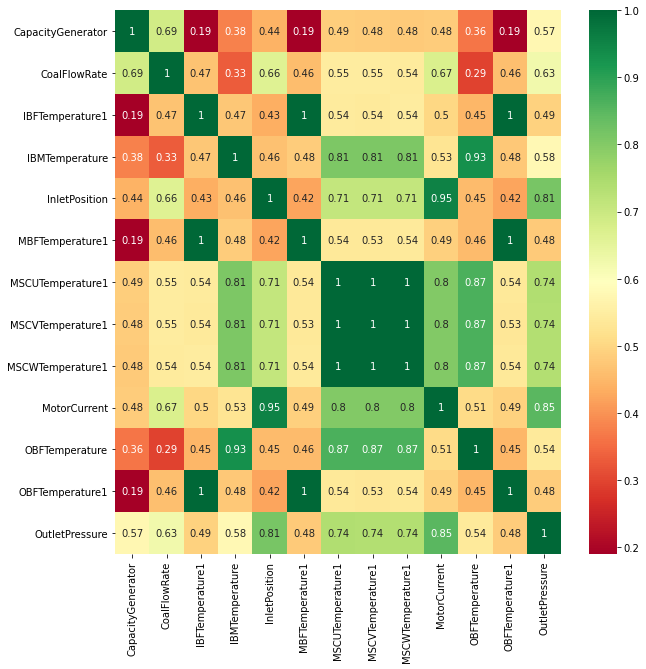

In [9]:
# Membuat korelasi terbaru dengan menggunakan heatmap
corr_Pearson1 = df_new.corr(method='pearson').round(10)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_Pearson1, 
            annot=True, 
            cmap="RdYlGn")

Dari hubungan korelasi antara atribut di atas, **korelasi paling tinggi antara atribut satu dengan lainnya yaitu bernilai 1** yang terdiri dari 
1. Hubungan IBFTemperature1 dengan MBFTemperature1
2. Hubungan IBFTemperature1 dengan OBFTemperature1
3. Hubungan MBFTemperature1 dengan IBFTemperature1
4. Hubungan IBFTemperature1 dengan OBFTemperature1
5. Hubungan MSCUTemperature1 dengan MSCVTemperature1
6. Hubungan MSCUTemperature1 dengan MSCWTemperature1
7. Hubungan MSCVTemperature1 dengan MSCwTemperature1

**Urutan kedua korelasi paling tinggi adalah bernilai 0,95** yaitu hubungan antara MotorCurrent dengan InletPosition. Selain itu, **nilai korelasi yang paling kecil antara atribut satu dengan atribut lainnya yaitu 0,19** yang terdiri dari hubungan CapacityGenerator dengan OBFTemperature1, hubungan CapacityGenerator dengan MBFTemperature1, dan hubungan CapacityGenerator dengan IBFTemperature1.

## 5. _Modeling_

Pada bagian ini, kita membangun model yang akan menyelesaikan masalah yang akan diselesaikan. Algoritma yang digunakan untuk _source code_ ini adalah LSTM (_Long Short Term Memory_) untuk _Multivariate_. 

### a. Normalisasi Data dengan _Scaling_
Beberapa pemodelan _machine learning_ seperti _neural network_ mengharuskan semua variabel memiliki rentang nilai yang sama. Hal ini disebabkan apabila rentang nilainya tidak sama, maka fitur dengan rentang nilai terbesar otomatis akan menjadi fitur yang paling mendominasi dalam proses _training_ sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai _training model_, kita terlebih dahulu perlu melakukan _data rescaling_ ke dalam rentang 0 dan 1 sehingga semua fitur berada dalam rentang nilai tersebut, yaitu nilai maksimal sebesar 1 dan nilai minimal 0.

In [10]:
# Melakukan scaling pada dataset dan menghilangkan kolom Timestamp
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normal = pd.DataFrame(scaler.fit_transform(df_new[df_new.columns.difference(['Timestamp1'])]), columns = df_new[df_new.columns.difference(['Timestamp1'])].columns)
df_normal.head()

CapacityGenerator  CoalFlowRate  IBFTemperature1  IBMTemperature  \
0           0.921825      0.781732              1.0        0.455067   
1           0.918339      0.769617              1.0        0.458993   
2           0.919402      0.794607              1.0        0.447011   
3           0.921316      0.770716              1.0        0.437829   
4           0.918129      0.799416              1.0        0.435813   

   InletPosition  MBFTemperature1  MSCUTemperature1  MSCVTemperature1  \
0       0.566267              1.0          0.625465          0.624205   
1       0.515746              1.0          0.591964          0.589034   
2       0.591107              1.0          0.585890          0.582786   
3       0.540791              1.0          0.584624          0.582744   
4       0.521330              1.0          0.578441          0.574287   

   MSCWTemperature1  MotorCurrent  OBFTemperature  OBFTemperature1  \
0          0.621180      0.516059        0.677532              1.0   
1          0.584101      0.464149        0.684810              1.0   
2          0.580011      0.495979        0.683572              1.0   
3          0.579612      0.485130        0.680175              1.0   
4          0.569802      0.465298        0.683432              1.0   

   OutletPressure  
0        0.707973  
1        0.688689  
2        0.650218  
3        0.591400  
4        0.584555

Agar dapat menampilkan time series maka kolom "Timestamp1" dari df_drop digabung dengan df_normal.

In [11]:
df_newest = pd.merge(df_drop[['Timestamp']], df_normal, left_index=True, right_index=True)
df_newest

Timestamp  CapacityGenerator  CoalFlowRate  IBFTemperature1  \
0    2021-01-04T08:00:00Z           0.921825      0.781732         1.000000   
1    2021-01-04T08:10:00Z           0.918339      0.769617         1.000000   
2    2021-01-04T08:20:00Z           0.919402      0.794607         1.000000   
3    2021-01-04T08:30:00Z           0.921316      0.770716         1.000000   
4    2021-01-04T08:40:00Z           0.918129      0.799416         1.000000   
..                    ...                ...           ...              ...   
669  2021-01-08T23:30:00Z           0.292871      0.482414         0.233168   
670  2021-01-08T23:40:00Z           0.361609      0.531288         0.224696   
671  2021-01-08T23:50:00Z           0.423470      0.523269         0.233421   
672  2021-01-09T00:00:00Z           0.395774      0.529420         0.237483   
673  2021-01-09T00:10:00Z           0.375468      0.526557         0.244831   

     IBMTemperature  InletPosition  MBFTemperature1  MSCUTemperature1  \
0          0.455067       0.566267         1.000000          0.625465   
1          0.458993       0.515746         1.000000          0.591964   
2          0.447011       0.591107         1.000000          0.585890   
3          0.437829       0.540791         1.000000          0.584624   
4          0.435813       0.521330         1.000000          0.578441   
..              ...            ...              ...               ...   
669        0.154095       0.301310         0.220276          0.093651   
670        0.149103       0.520414         0.218638          0.117403   
671        0.153841       0.520401         0.224608          0.141021   
672        0.155903       0.545908         0.227578          0.158683   
673        0.160923       0.391796         0.237414          0.168333   

     MSCVTemperature1  MSCWTemperature1  MotorCurrent  OBFTemperature  \
0            0.624205          0.621180      0.516059        0.677532   
1            0.589034          0.584101      0.464149        0.684810   
2            0.582786          0.580011      0.495979        0.683572   
3            0.582744          0.579612      0.485130        0.680175   
4            0.574287          0.569802      0.465298        0.683432   
..                ...               ...           ...             ...   
669          0.102680          0.104293      0.211428        0.235618   
670          0.124105          0.125491      0.325473        0.224725   
671          0.146972          0.148197      0.333872        0.225167   
672          0.165585          0.166027      0.356124        0.229251   
673          0.179711          0.180771      0.293066        0.235021   

     OBFTemperature1  OutletPressure  
0           1.000000        0.707973  
1           1.000000        0.688689  
2           1.000000        0.650218  
3           1.000000        0.591400  
4           1.000000        0.584555  
..               ...             ...  
669         0.205200        0.178102  
670         0.201863        0.358750  
671         0.214849        0.453631  
672         0.220686        0.428302  
673         0.244345        0.386161  

[674 rows x 14 columns]

### b. Mengubah Tipe Data Fitur Timestamp Menjadi datetime

Hal pertama yang dilakukan adalah melihat tipe data dari df_newest.

In [12]:
# Melihat tipe data dari df_newest
df_newest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          674 non-null    object 
 1   CapacityGenerator  674 non-null    float64
 2   CoalFlowRate       674 non-null    float64
 3   IBFTemperature1    674 non-null    float64
 4   IBMTemperature     674 non-null    float64
 5   InletPosition      674 non-null    float64
 6   MBFTemperature1    674 non-null    float64
 7   MSCUTemperature1   674 non-null    float64
 8   MSCVTemperature1   674 non-null    float64
 9   MSCWTemperature1   674 non-null    float64
 10  MotorCurrent       674 non-null    float64
 11  OBFTemperature     674 non-null    float64
 12  OBFTemperature1    674 non-null    float64
 13  OutletPressure     674 non-null    float64
dtypes: float64(13), object(1)
memory usage: 73.8+ KB


Dari hasil di atas, tipe data untuk fitur Timestamp adalah objek. Oleh karena itu, tipe data tersebut perlu diubah menjadi tipe data datetime.

In [13]:
df_newest['Timestamp'] = pd.to_datetime(df_newest.Timestamp).dt.tz_localize(None)
df_newest

Timestamp  CapacityGenerator  CoalFlowRate  IBFTemperature1  \
0   2021-01-04 08:00:00           0.921825      0.781732         1.000000   
1   2021-01-04 08:10:00           0.918339      0.769617         1.000000   
2   2021-01-04 08:20:00           0.919402      0.794607         1.000000   
3   2021-01-04 08:30:00           0.921316      0.770716         1.000000   
4   2021-01-04 08:40:00           0.918129      0.799416         1.000000   
..                  ...                ...           ...              ...   
669 2021-01-08 23:30:00           0.292871      0.482414         0.233168   
670 2021-01-08 23:40:00           0.361609      0.531288         0.224696   
671 2021-01-08 23:50:00           0.423470      0.523269         0.233421   
672 2021-01-09 00:00:00           0.395774      0.529420         0.237483   
673 2021-01-09 00:10:00           0.375468      0.526557         0.244831   

     IBMTemperature  InletPosition  MBFTemperature1  MSCUTemperature1  \
0          0.455067       0.566267         1.000000          0.625465   
1          0.458993       0.515746         1.000000          0.591964   
2          0.447011       0.591107         1.000000          0.585890   
3          0.437829       0.540791         1.000000          0.584624   
4          0.435813       0.521330         1.000000          0.578441   
..              ...            ...              ...               ...   
669        0.154095       0.301310         0.220276          0.093651   
670        0.149103       0.520414         0.218638          0.117403   
671        0.153841       0.520401         0.224608          0.141021   
672        0.155903       0.545908         0.227578          0.158683   
673        0.160923       0.391796         0.237414          0.168333   

     MSCVTemperature1  MSCWTemperature1  MotorCurrent  OBFTemperature  \
0            0.624205          0.621180      0.516059        0.677532   
1            0.589034          0.584101      0.464149        0.684810   
2            0.582786          0.580011      0.495979        0.683572   
3            0.582744          0.579612      0.485130        0.680175   
4            0.574287          0.569802      0.465298        0.683432   
..                ...               ...           ...             ...   
669          0.102680          0.104293      0.211428        0.235618   
670          0.124105          0.125491      0.325473        0.224725   
671          0.146972          0.148197      0.333872        0.225167   
672          0.165585          0.166027      0.356124        0.229251   
673          0.179711          0.180771      0.293066        0.235021   

     OBFTemperature1  OutletPressure  
0           1.000000        0.707973  
1           1.000000        0.688689  
2           1.000000        0.650218  
3           1.000000        0.591400  
4           1.000000        0.584555  
..               ...             ...  
669         0.205200        0.178102  
670         0.201863        0.358750  
671         0.214849        0.453631  
672         0.220686        0.428302  
673         0.244345        0.386161  

[674 rows x 14 columns]

Selanjutnya, kita memastikan perubahan tipe data dengan melakukan langkah di bawah ini.

In [14]:
df_newest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          674 non-null    datetime64[ns]
 1   CapacityGenerator  674 non-null    float64       
 2   CoalFlowRate       674 non-null    float64       
 3   IBFTemperature1    674 non-null    float64       
 4   IBMTemperature     674 non-null    float64       
 5   InletPosition      674 non-null    float64       
 6   MBFTemperature1    674 non-null    float64       
 7   MSCUTemperature1   674 non-null    float64       
 8   MSCVTemperature1   674 non-null    float64       
 9   MSCWTemperature1   674 non-null    float64       
 10  MotorCurrent       674 non-null    float64       
 11  OBFTemperature     674 non-null    float64       
 12  OBFTemperature1    674 non-null    float64       
 13  OutletPressure     674 non-null    float64       
dtypes: datetim

Karena pemodelan hanya mengubah data float maka fitur Timestamp1 dijadikan index

In [15]:
df_newest.set_index('Timestamp',inplace=True)

### c. Menampilkan Hasil Normalisasi _Dataset_

Hasil normalisasi ini menampilkan _dataframe_ dari df_newest dan semua visualisi dalam bentuk diagram garis. Langkah pertama mengurutkan kolom yang digunakan.

In [16]:
# Mengurutkan kolom yang digunakan
df_newest = df_newest[['CapacityGenerator','CoalFlowRate', 'IBFTemperature1', 'IBMTemperature', 
          'InletPosition','MBFTemperature1', 'MotorCurrent', 'MSCUTemperature1', 
         'MSCVTemperature1', 'MSCWTemperature1', 'OBFTemperature1', 'OBFTemperature',
         'OutletPressure']]
df_newest

CapacityGenerator  CoalFlowRate  IBFTemperature1  \
Timestamp                                                               
2021-01-04 08:00:00           0.921825      0.781732         1.000000   
2021-01-04 08:10:00           0.918339      0.769617         1.000000   
2021-01-04 08:20:00           0.919402      0.794607         1.000000   
2021-01-04 08:30:00           0.921316      0.770716         1.000000   
2021-01-04 08:40:00           0.918129      0.799416         1.000000   
...                                ...           ...              ...   
2021-01-08 23:30:00           0.292871      0.482414         0.233168   
2021-01-08 23:40:00           0.361609      0.531288         0.224696   
2021-01-08 23:50:00           0.423470      0.523269         0.233421   
2021-01-09 00:00:00           0.395774      0.529420         0.237483   
2021-01-09 00:10:00           0.375468      0.526557         0.244831   

                     IBMTemperature  InletPosition  MBFTemperature1  \
Timestamp                                                             
2021-01-04 08:00:00        0.455067       0.566267         1.000000   
2021-01-04 08:10:00        0.458993       0.515746         1.000000   
2021-01-04 08:20:00        0.447011       0.591107         1.000000   
2021-01-04 08:30:00        0.437829       0.540791         1.000000   
2021-01-04 08:40:00        0.435813       0.521330         1.000000   
...                             ...            ...              ...   
2021-01-08 23:30:00        0.154095       0.301310         0.220276   
2021-01-08 23:40:00        0.149103       0.520414         0.218638   
2021-01-08 23:50:00        0.153841       0.520401         0.224608   
2021-01-09 00:00:00        0.155903       0.545908         0.227578   
2021-01-09 00:10:00        0.160923       0.391796         0.237414   

                     MotorCurrent  MSCUTemperature1  MSCVTemperature1  \
Timestamp                                                               
2021-01-04 08:00:00      0.516059          0.625465          0.624205   
2021-01-04 08:10:00      0.464149          0.591964          0.589034   
2021-01-04 08:20:00      0.495979          0.585890          0.582786   
2021-01-04 08:30:00      0.485130          0.584624          0.582744   
2021-01-04 08:40:00      0.465298          0.578441          0.574287   
...                           ...               ...               ...   
2021-01-08 23:30:00      0.211428          0.093651          0.102680   
2021-01-08 23:40:00      0.325473          0.117403          0.124105   
2021-01-08 23:50:00      0.333872          0.141021          0.146972   
2021-01-09 00:00:00      0.356124          0.158683          0.165585   
2021-01-09 00:10:00      0.293066          0.168333          0.179711   

                     MSCWTemperature1  OBFTemperature1  OBFTemperature  \
Timestamp                                                                
2021-01-04 08:00:00          0.621180         1.000000        0.677532   
2021-01-04 08:10:00          0.584101         1.000000        0.684810   
2021-01-04 08:20:00          0.580011         1.000000        0.683572   
2021-01-04 08:30:00          0.579612         1.000000        0.680175   
2021-01-04 08:40:00          0.569802         1.000000        0.683432   
...                               ...              ...             ...   
2021-01-08 23:30:00          0.104293         0.205200        0.235618   
2021-01-08 23:40:00          0.125491         0.201863        0.224725   
2021-01-08 23:50:00          0.148197         0.214849        0.225167   
2021-01-09 00:00:00          0.166027         0.220686        0.229251   
2021-01-09 00:10:00          0.180771         0.244345        0.235021   

                     OutletPressure  
Timestamp                            
2021-01-04 08:00:00        0.707973  
2021-01-04 08:10:00        0.688689  
2021-01-04 08:20:00        0.650218  
2021-01-04 08:30:00        0.591400  
2021-0

Setelah kolom dari _dataset_ urut, langkah selanjutnya membuat visualisasi untuk semua atribut yang ada di _dataframe_ dari df_newest. 

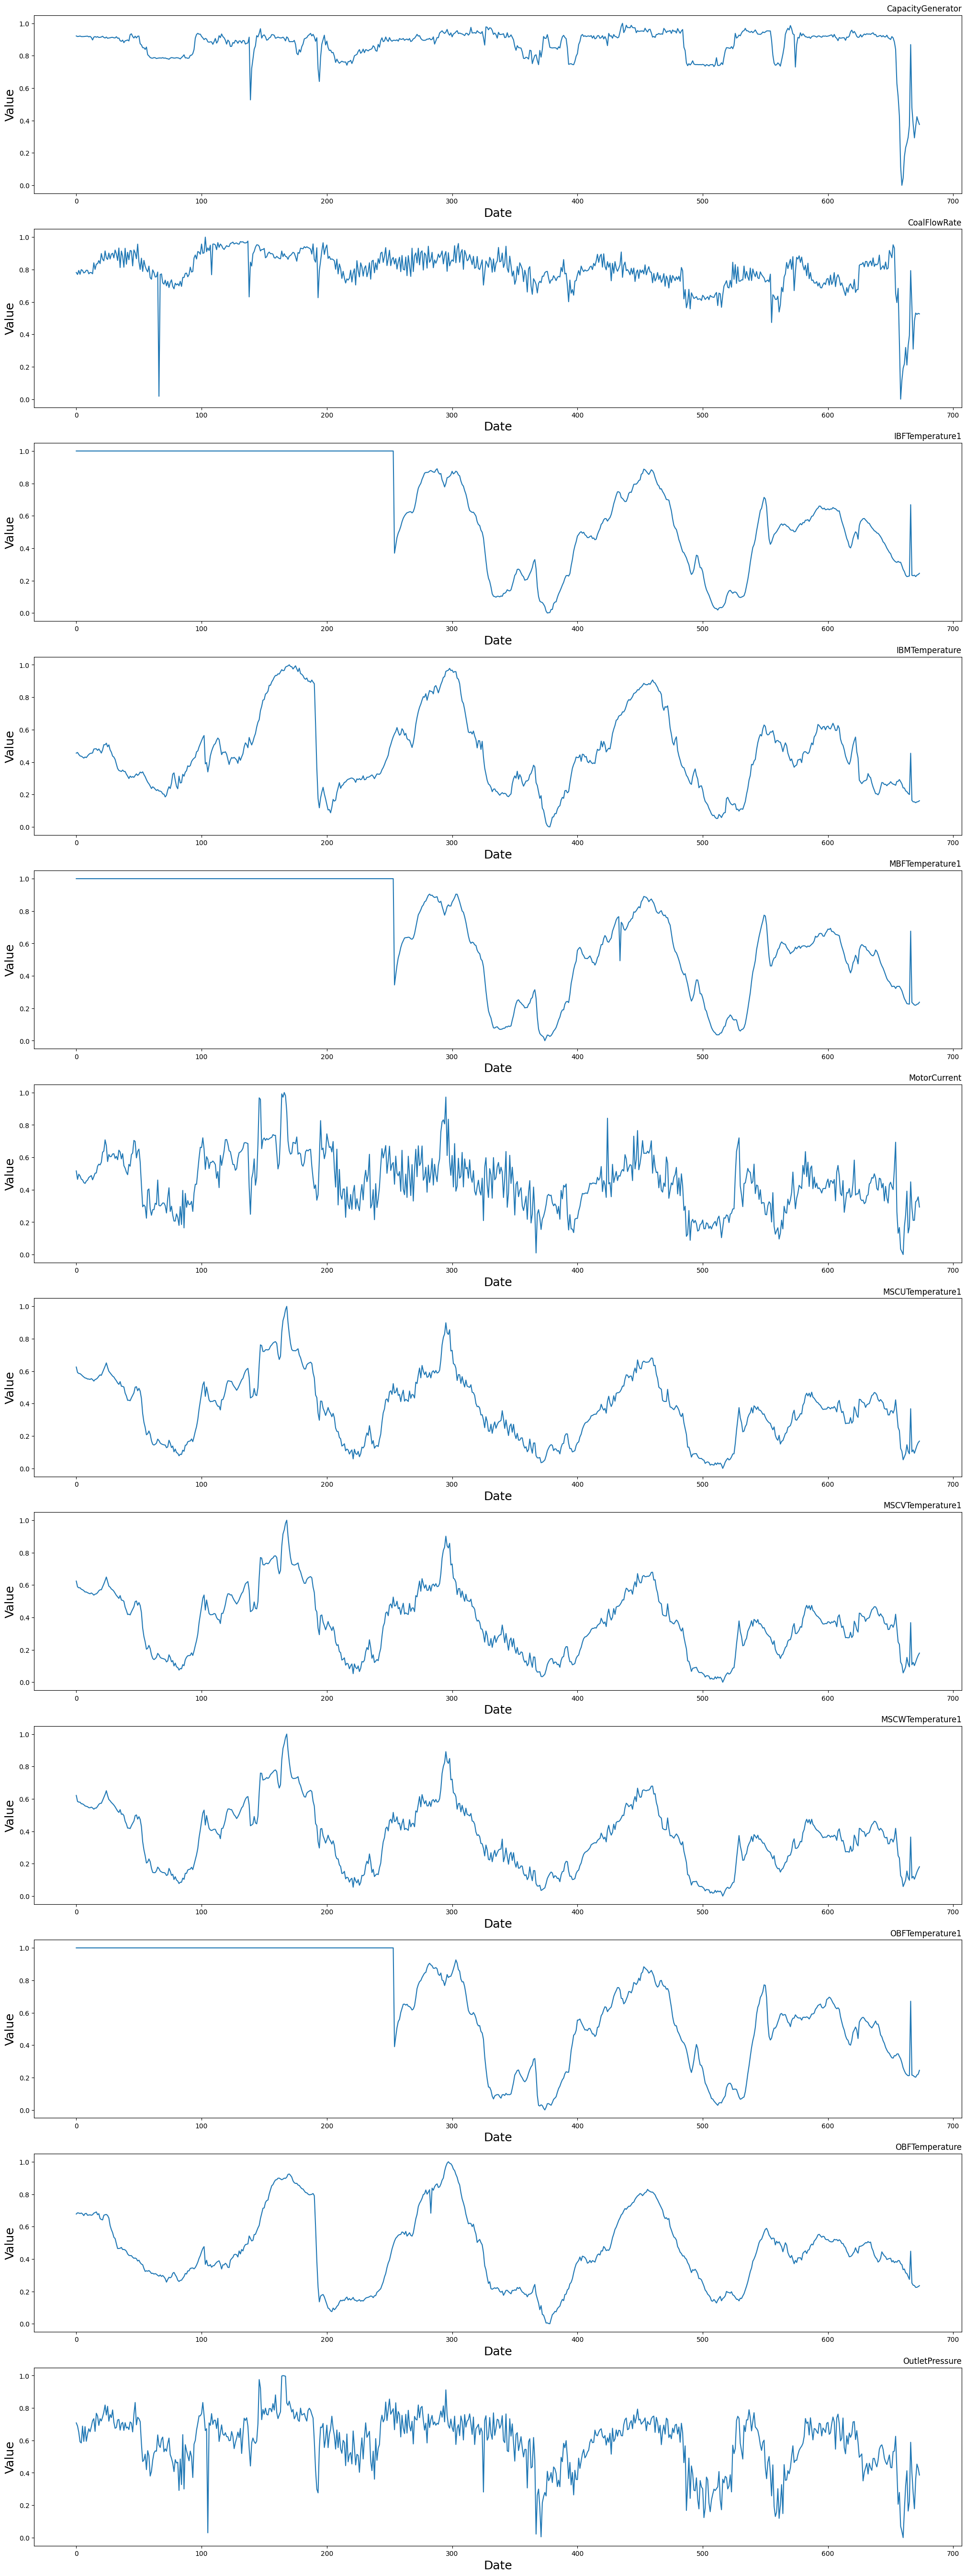

In [29]:
# Memanggil library yang digunakan
from matplotlib import pyplot
from matplotlib.pyplot import figure

# Memuat dataset
values = df_newest.values
# Menspesifikasikan kolom ke plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]
i = 1
# Memplot setiap kolom
plt.figure(figsize=(25,70), dpi=100)
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Value', fontsize=18)
    plt.title(df_newest.columns[group], y=1, loc='right')
    i += 1
plt.show()

### d. Pemodelan dalam _Timestamp_ Historis

Langkah pertama untuk bagian ini adalah memanggil _library_ yang digunakan untuk persiapan pemodelan.

In [18]:
from math import sqrt # Operasi untuk pengakaran
from numpy import concatenate # Operasi untuk menggabungkan
from matplotlib import pyplot # Pembuatan grafik
from pandas import DataFrame, concat # Pengolahan dataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Pembuatan skala dan pelabelan
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Untuk evaluasi model
# Pemodelan data
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout

Sebelum menerapkan pemodelan, _forecasting_ untuk _time series_ berupa _multivariate_ perlu dibingkai ulang sebagai _supervised learning_ ke dalam pasangan _input-output_. Fungsi menggunakan argumen :
1. Data  : daftar/list  NumPy 2D
2. n_in  : jumlah pengamatan lag sebagai input X
3. n_out : jumlah observasi sebagai output Y 
4. dropnan :fungsi boolean untuk menghilangkan baris bernilai NaN
5. return : mengembalikan fungsi


Selanjutnya memodelkan LSTM untuk _data input_ berupa _multivariate_. Pertama _dataset_ dari df_neweast dibagi menjadi 70% _data training_ dan 30% _data test_. _Dataset_ tidak dibagi ke dalam bagian validasi dikarenakan ukuran _dataset_ yang terbilang kecil dan juga _dataset_ tersebut dibagi kembali menjadi variabel _input_ dan _output_. Terakhir masukan X dibentuk menjadi 3 dimensi (karena format array dari LSTM berupa 3 dimensi) yaitu [sampel, timestep, fitur].

In [19]:
# Mengonversi timeseries menjadi supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # Masukan sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Menyatukan semuanya
    agg = concat(cols, axis=1)
    agg.columns = names
    # Men-drop semua baris yang terdapat NaN Values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Memuat dataset
dataset = df_newest
values = dataset.values
# Mengintegerkan arah encode
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# Membuat semua data menjadi float
values = values.astype('float32')
# Menormalisasikan fitur
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# Menentukan jumlah jam jeda
n_hours = 3
n_features = 13
# Membuat frame menjadi supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)

# Membagi data menjadi data train dan data test
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# Membagi data menjadi input dan output
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
# Membentuk ulang masukan menjadi 3 dimensi yaitu [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print("Shape untuk data training X :", train_X.shape)
print("Shape untuk data training y :", train_y.shape)
print("Shape untuk data test X :", test_X.shape)
print("Shape untuk data test y :", test_y.shape)

Shape untuk data training X : (469, 3, 13)
Shape untuk data training y : (469,)
Shape untuk data test X : (202, 3, 13)
Shape untuk data test y : (202,)


Selanjutnya, kita melakukan pendefinisian LSTM. Model _regressor_ ini menggunakan 50 neuron di _hidden layer_ pertama dan 1 neuron di _output layer_. Fungsi untuk menentukan_loss regresi_ menggunakan _Mean Absolute Error_ dan _optimizer_ dengan 'adam' agar efisien LSTM sensitif terhadap _gradient descent_. Setelah itu, kita melakukan _fit_ kepada model ke dalam 50 _training epoch_ dengan _batchsize_ 72. 

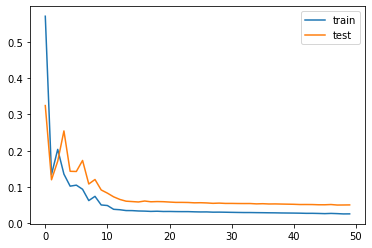

In [20]:
# Membuat layer untuk LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# Melakukan fit untuk model
history = model.fit(train_X, train_y, epochs=50, batch_size=72, 
                    validation_data=(test_X, test_y), verbose=0, 
                    shuffle=False)
# Membuat plot untuk History
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Kurva di atas memiliki _training loss_ yang _descending_ atau menurun ke titik stabilitas yang berarti pemodelan sudah baik dalam menyesuaikan _data training_ dan _validation loss_ yang _descending_ atau menurun ke titik stabilitas juga memiliki arti bahwa pemodelan juga baik dalam menyesuaikan _data test_ atau validasi. Selain itu, nilai _descending_ untuk _training and validation losses_ memiliki celah yang tipis dan relatif cukup stabil sehingga artinya __pemodelan ini baik (tidak _underfitting_ maupun _overfitting_)__.

### e. Memvisualisasikan Hasil Prediksi dari Model yang telah Dibuat

Langkah pertama yaitu membuat prediksi berdasarkan model yang telah dibuat di bagian d tadi. Selain itu, hasil prediksi perlu diinverse skalanya menjadi skala sebenarnya, baik itu hasil prediksi atau nilai sebenarnya.

In [21]:
# Membuat prediksi
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# Menginverse skala untuk forecast
inv_yhat = concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# Menginverse skala untuk actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

Langkah selanjutnya menampilkan hasil prediksi dan nilai sebenarnya dalam bentuk tabel.

In [30]:
# Membuat kolom untuk hasil prediksi dan nilai sebenarnya
df1 = pd.DataFrame(inv_yhat, columns = ['Predicted'])
df2 = pd.DataFrame(test_y,  columns = ['Actual'])
# Menggabungkan kolom menjadi satu tabel
test = pd.DataFrame(df1)
pred = pd.DataFrame(df2)
results = pd.concat([test,pred],axis=1)
results

Predicted    Actual
0     0.932975  0.951603
1     0.928294  0.950862
2     0.914356  0.955531
3     0.918744  0.937788
4     0.925701  0.958745
..         ...       ...
197   0.690445  0.292871
198   0.557897  0.361609
199   0.545934  0.423470
200   0.583271  0.395774
201   0.614140  0.375468

[202 rows x 2 columns]

Langkah terakhir menampilkan hasil prediksi dengan melakukan visualisasi data untuk mendapatkan hasil _future value_ dari model yang telah dibuat.

In [24]:
# Memanggil library yang digunakan
import plotly.graph_objects as go
import numpy as np
# Melakukan drop terhadap kolom Timestamp dari dataset 
df_drop['Timestamp'] = pd.to_datetime(df_drop['Timestamp'])
df.set_axis(df_drop['Timestamp'], inplace=True)
# Membentuk kembali fitur CapacityGenerator untuk value grafik
data = df_newest['CapacityGenerator'].values
data = data.reshape((-1,1))
# Membagi data untuk test dan prediksi
split_percent = 0.70
split = int(split_percent*len(data))
# Melakukan drop fitur Timestamp untuk membagi data yang dijadikan data train dan dijadikan data test
timestamp_train = df_drop['Timestamp'][:split]
timestamp_test = df_drop['Timestamp'][split:]
# Melakukan drop fitur CapacityGenerator untuk membagi data yang dijadikan data train dan dijadikan data test
close_train = df_newest['CapacityGenerator'][:split]
prediction = inv_yhat
close_test = df_newest['CapacityGenerator'][split:]
# Membuat dan menampilkan grafik hasil pemodelan
trace1 = go.Scatter(
    x = timestamp_train,
    y = close_train,
    mode = 'lines',
    name = 'Data Train'
)
trace2 = go.Scatter(
    x = timestamp_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediksi'
)
trace3 = go.Scatter(
    x = timestamp_test,
    y = close_test,
    mode='lines',
    name = 'Data Test'
)
layout = go.Layout(
    title = "Time-series Forecasting antara Sensor Data IDF terhadap Keluaran Generator",
    xaxis = {'title' : "Rentang Waktu"},
    yaxis = {'title' : "Keluaran Generator"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

Grafik di atas merupakan hasil prediksi timestep untuk 1 langkah ke depan var(t) atau 'CoalFlowRate' terhadap nilai aktual 'CapacityGenerator'.

## 6. Evaluasi Model

Pada bagian ini, kita melakukan evaluasi terhadap model yang telah dibuat dengan menggunakan algoritma yang digunakan untuk _source code_ ini yaitu LSTM (_Long Short Term Memory_) untuk _Multivariate_. Evaluasi dilakukan dengan menggunakan 3 cara yaitu _Root Mean Squared Error_ (RMSE), _Mean Squared Error_ (MSE), dan _R2 Score_.

In [22]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('RMSE : %.3f' % rmse)
r_squared = r2_score(inv_y, inv_yhat)
print('R2   : %.3f'% r_squared)
mae = mean_absolute_error(inv_y, inv_yhat)
print('MAE  : %.3f '% mae)

RMSE : 0.099
R2   : 0.703
MAE  : 0.051 


Dalam pemodelan regresi yang mengukur selisih antara nilai aktual dan nilai prediksi atau bisa disebut _error_. Hasilnya terdapat 3 metode matrik _performance evaluation_ yang digunakan yaitu R2 atau _R-Squared_, MAE atau _Mean Absolute Error_, dan RMSE atau _Root Mean Squared Error_. Nilai R2 menunjukkan seberapa akurat variabel independen atau bebas dalam menjelaskan variabilitas dalam variabel dependen atau terikat, nilai MAE lebih ditujukan untuk data _outlier_, dan RMSE merupakan matrik yang lebih baik di antara ketiga metode tersebut karena lebih cocok dalam perbandingan model regresi. Pada pemodelan _time series forecasting_ dengan _multivariate_ untuk regresi ini, hasil prediksi menghasilkan nilai RMSE, R2, dan MAE yang cukup baik di tiap hubungan antar variabel independen _multivariate_ dengan variabel dependen "CapacityGenerator".

## Daftar Pustaka

Moritz, S. and Bartz-Beielstein, T., 2017. _imputeTS: time series missing value imputation in R. R J._, 9(1), p.207.

Eskelson, B.N., Temesgen, H., Lemay, V., Barrett, T.M., Crookston, N.L. and Hudak, A.T., 2009. The roles of nearest neighbor methods in imputing missing data in forest inventory and monitoring databases. _Scandinavian Journal of Forest Research_, 24(3), pp.235-246.

https://www.baass.com/blog/why-forecasting-is-important-for-business-success